# Dados Airbnb Rio de Janeiro

### Descobrir bairros com maior número de imóveis para alugar.
### Imóveis mais avaliados.
### Tipo de imóvel (quarto/apt,casa interia)
### Média de preços por bairro.
### Boxplot dos preços 
### Média do mínimo de diárias exigidas
### Boxplot disponibilidade.

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
# Importação da base de dados.
df = pd.read_csv("/Users/pedroafornali/Downloads/listings.csv")

In [139]:
# Vizualização dos dados.
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,350,5,267,2021-12-03,1.92,1,257,10,NaN
1,24480,"Nice and cozy near Ipanema Beach, w/ home office",99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,296,3,85,2018-02-14,0.62,1,107,0,NaN
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,387,3,238,2020-02-15,1.69,1,206,0,NaN
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,172,2,181,2020-03-15,1.82,1,207,0,NaN
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,260,3,378,2021-12-05,2.76,1,58,32,NaN


In [140]:
#Descrição dos dados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24549 entries, 0 to 24548
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              24549 non-null  int64  
 1   name                            24528 non-null  object 
 2   host_id                         24549 non-null  int64  
 3   host_name                       24534 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   24549 non-null  object 
 6   latitude                        24549 non-null  float64
 7   longitude                       24549 non-null  float64
 8   room_type                       24549 non-null  object 
 9   price                           24549 non-null  int64  
 10  minimum_nights                  24549 non-null  int64  
 11  number_of_reviews               24549 non-null  int64  
 12  last_review                     

In [141]:
# Exclui as colunas com dados nulos.
df = df.drop(['neighbourhood_group', 'license'], axis = 1)

[]

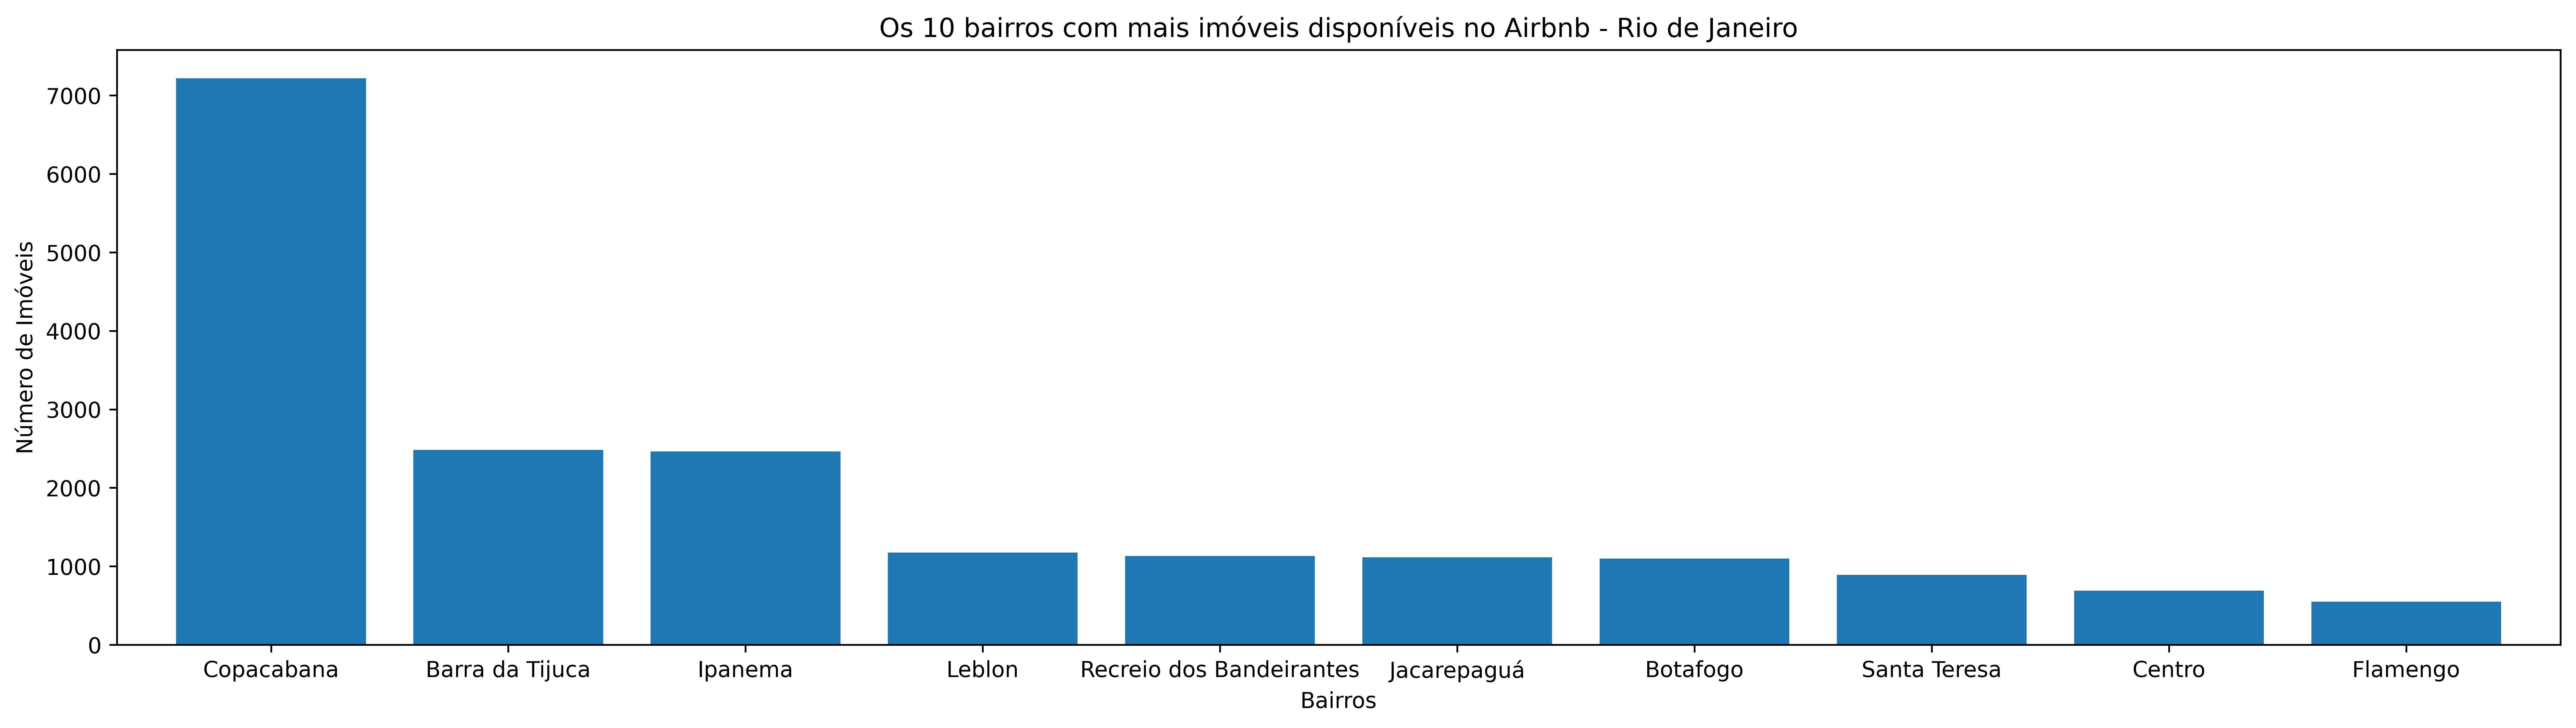

In [142]:
# Número de imóveis por bairros.

plt.figure(figsize=(20,5), dpi = 600)
df.groupby(["neighbourhood"])["id"].count().sort_values(ascending=False)[:10].plot.bar( 
    width = 0.8,
    rot    =0,
    xlabel = "Bairros",
    ylabel = "Número de Imóveis",
    title  = "Os 10 bairros com mais imóveis disponíveis no Airbnb - Rio de Janeiro")
plt.plot()

In [143]:
## Criação de um terceiro DataFrame para analisar os imóveis mais avaliados. 

In [144]:
df1 = pd.DataFrame()
df1["Host ID"] = df["host_id"]
df1["Nome do Imóvel"] = df["name"]
df1["Número de Avaliações"] = df["number_of_reviews"]

In [145]:
df1 = df1.sort_values(by=['Número de Avaliações'],ascending=False)

In [146]:
df1.head(10)

,Host ID,Nome do Imóvel,Número de Avaliações
277,2444956,CASABLANCA 1 STUNNING BEACHFRONT,504
4847,24875639,"COPACABANA,PRAIA/METRO,MELHOR CUSTO BENEFÍCIO",490
131,319672,2 bedroom apart with view to the lagoon and ga...,485
638,5475732,Praia de Copacabana,451
18,319672,Apart-hotel in Ipanema with service and garage,422
1169,10675906,Copacabana Beach - Av Atlântica (Sea View - 11th),420
101,503995,❤️ MODERN LOFT IN BEST SPOT OF IPANEMA 1 - 120...,405
362,3413077,Apart hotel - COPACABANA beach,392
4,153691,COPACABANA SEA BREEZE - RIO - 20 X Superhost,378
9340,40784340,"Copacabana beach airbnb plus, Vibrant Apartment",376


#### Tabela com os imóveis com o maior número de avaliações dos hospedes.

In [147]:
## Criando DataFrame para analisar o tipo de imóvel disponível.


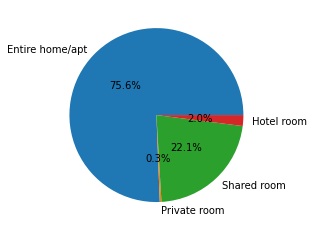

In [148]:
plt.pie(df.groupby(["room_type"])["room_type"].count(),
       labels = df["room_type"].unique(),
        autopct='%1.1f%%',
        pctdistance=0.5,
       )

plt.show()

In [149]:
# Gera a média de preços por bairro.

df.groupby(["neighbourhood"])["price"].mean().sort_values(ascending=False)[:15] 

neighbourhood
São Cristóvão         9411.930556
Joá                   5722.670000
Santa Cruz            3586.157895
São Conrado           2696.937198
Alto da Boa Vista     2391.451613
Anchieta              2069.000000
Itanhangá             1549.975207
Lagoa                 1508.947368
Cachambi              1397.040000
Barra de Guaratiba    1372.776316
Leblon                1361.878943
Ipanema               1336.564582
Jardim Botânico       1336.358696
Bangu                 1296.090909
Caju                  1284.000000
Name: price, dtype: float64

#### Repare que existem valores elevados, por isso vamos pesquisar mais a fundo o que está acontecendo.

In [150]:
# Gera a base de dados com bairro = São Cristóvão e ordem descendendte de preços. 

df[df["neighbourhood"] == "São Cristóvão"].sort_values("price", ascending=False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
6984,13879989,Temporary rentals for Brazilian Cup.,82046629,Elizabeth,São Cristóvão,-22.899930,-43.23033,Shared room,650476,6,0,NaN,NaN,1,365,0
1868,2693631,Apartamento Copa 2014 Fifa Maracana,13785748,Fausto,São Cristóvão,-22.905610,-43.22026,Entire home/apt,3008,20,0,NaN,NaN,1,365,0
2251,2962403,Apartment near Maracanã and Subway,15092465,Flavia,São Cristóvão,-22.907210,-43.21902,Private room,2900,1,2,2014-06-29,0.02,1,365,0
2343,3026731,Apartment near the Maracana stadium,15051255,Marcelo,São Cristóvão,-22.904700,-43.21950,Entire home/apt,1419,15,0,NaN,NaN,1,365,0
15015,39210039,Apto dos Sonhos - Segurança Total - Perto de Tudo,300882386,Neide,São Cristóvão,-22.904890,-43.22119,Entire home/apt,943,4,2,2020-02-26,0.08,1,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22206,52613126,apartamento aconchegante São Cristóvão. Ao lad...,333895956,Charliane,São Cristóvão,-22.887010,-43.22588,Private room,95,1,0,NaN,NaN,1,365,0
8354,15178371,Quarto no bairro imperial de São Cristovão no Rio,15813824,Ricardo,São Cristóvão,-22.891600,-43.21891,Private room,80,1,1,2019-10-06,0.04,1,362,0
9428,18268643,Apartamento São Cristóvão - Centro-Rio de Janeiro,105047991,Josiara,São Cristóvão,-22.901520,-43.22857,Entire home/apt,76,1,17,2020-02-18,0.30,1,208,0
11286,26088689,Alugo quarto apenas para MULHER por temporada..,196091649,Elli,São Cristóvão,-22.897200,-43.22982,Private room,60,30,0,NaN,NaN,1,365,0


In [151]:
# Gera toda a base de dados listada em ordem desdendente de preços.

df.sort_values('price',ascending=False)[:20]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
6984,13879989,Temporary rentals for Brazilian Cup.,82046629,Elizabeth,São Cristóvão,-22.89993,-43.23033,Shared room,650476,6,0,NaN,NaN,1,365,0
15019,39212507,B&B Linda House - Double bedroom between Copac...,247378002,Loris,Copacabana,-22.98233,-43.19285,Private room,141884,1,0,NaN,NaN,7,338,0
18216,45546385,#215 TIR8 - Lindo Estúdio no melhor ponto de C...,366913236,Daniel,Copacabana,-22.97497,-43.18880,Entire home/apt,129080,1,15,2021-12-12,1.02,16,29,13
3611,6932221,Villa Del Sol Vista Mar - 2o Andar,35879856,Michelly,Recreio dos Bandeirantes,-23.02953,-43.47678,Entire home/apt,129080,3,0,NaN,NaN,2,243,0
10961,23675965,Rio Spot Homes T030 Arpoador,13580277,Marcio,Ipanema,-22.98677,-43.19477,Entire home/apt,129080,3,20,2021-10-13,0.44,45,0,4
3595,6847304,Villa Del Sol Vista Mar - 3o Andar,35879856,Michelly,Recreio dos Bandeirantes,-23.03111,-43.47714,Entire home/apt,129080,1,0,NaN,NaN,2,243,0
18336,45731547,Rio Spot IPA C054,13580277,Marcio,Ipanema,-22.98460,-43.19524,Entire home/apt,129080,1,6,2021-10-12,0.46,45,0,4
18621,46139434,#905 TIR29 - Maravilhoso Apartamento com vista...,366913236,Daniel,Copacabana,-22.97874,-43.18996,Entire home/apt,110688,1,2,2021-11-07,1.13,16,28,2
17921,44559774,Excelente localização ✸ Apenas 2 quadras da pr...,5615480,Andrea,Ipanema,-22.98325,-43.20331,Entire home/apt,96438,2,9,2021-12-11,0.61,18,294,7
9798,20302472,Rio Spot Homes I001,13580277,Marcio,Copacabana,-22.98449,-43.18992,Entire home/apt,92620,3,40,2021-12-07,0.76,45,51,8


In [152]:
# Gera uma tabela com todos os imóveis listados com preço maior que mil reais e trás informações sobre esses dados.
# No caso existem 5079 imóveis com preços maiores de mil reais.

tabela = df[df["price"]>1000]
tabela.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5079 entries, 5 to 24544
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5079 non-null   int64  
 1   name                            5070 non-null   object 
 2   host_id                         5079 non-null   int64  
 3   host_name                       5071 non-null   object 
 4   neighbourhood                   5079 non-null   object 
 5   latitude                        5079 non-null   float64
 6   longitude                       5079 non-null   float64
 7   room_type                       5079 non-null   object 
 8   price                           5079 non-null   int64  
 9   minimum_nights                  5079 non-null   int64  
 10  number_of_reviews               5079 non-null   int64  
 11  last_review                     2431 non-null   object 
 12  reviews_per_month               2

In [153]:
# Exclui da tabela todos os imóveis com preço superior a mil reais.

indexnames = df[df["price"]>1000].index
df.drop(indexnames, inplace = True)
df


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,Copacabana,-22.965990,-43.179400,Entire home/apt,350,5,267,2021-12-03,1.92,1,257,10
1,24480,"Nice and cozy near Ipanema Beach, w/ home office",99249,Goya,Ipanema,-22.984050,-43.201890,Entire home/apt,296,3,85,2018-02-14,0.62,1,107,0
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,Copacabana,-22.977350,-43.191050,Entire home/apt,387,3,238,2020-02-15,1.69,1,206,0
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,Ipanema,-22.988390,-43.192320,Entire home/apt,172,2,181,2020-03-15,1.82,1,207,0
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,Copacabana,-22.981070,-43.191360,Entire home/apt,260,3,378,2021-12-05,2.76,1,58,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24543,53956728,Apartamento espaçoso e arejado no Flamengo.,437082887,Thiago,Flamengo,-22.936667,-43.176839,Private room,309,1,0,NaN,NaN,1,9,0
24545,53957980,Stunning & Luxurious Apartment in Flamengo (#2),20561832,Pedro,Flamengo,-22.932098,-43.177090,Entire home/apt,460,2,1,2021-12-24,1.00,4,3,1
24546,53958210,Apartamento aconchegante no Leme,71566676,Dulce/Raquel,Leme,-22.962902,-43.170973,Entire home/apt,891,2,0,NaN,NaN,1,267,0
24547,53958814,Apto 520 na Quadra da Praia de Copacabana Posto 3,33865879,Miguel,Copacabana,-22.968714,-43.183293,Entire home/apt,177,4,0,NaN,NaN,4,81,0


[]

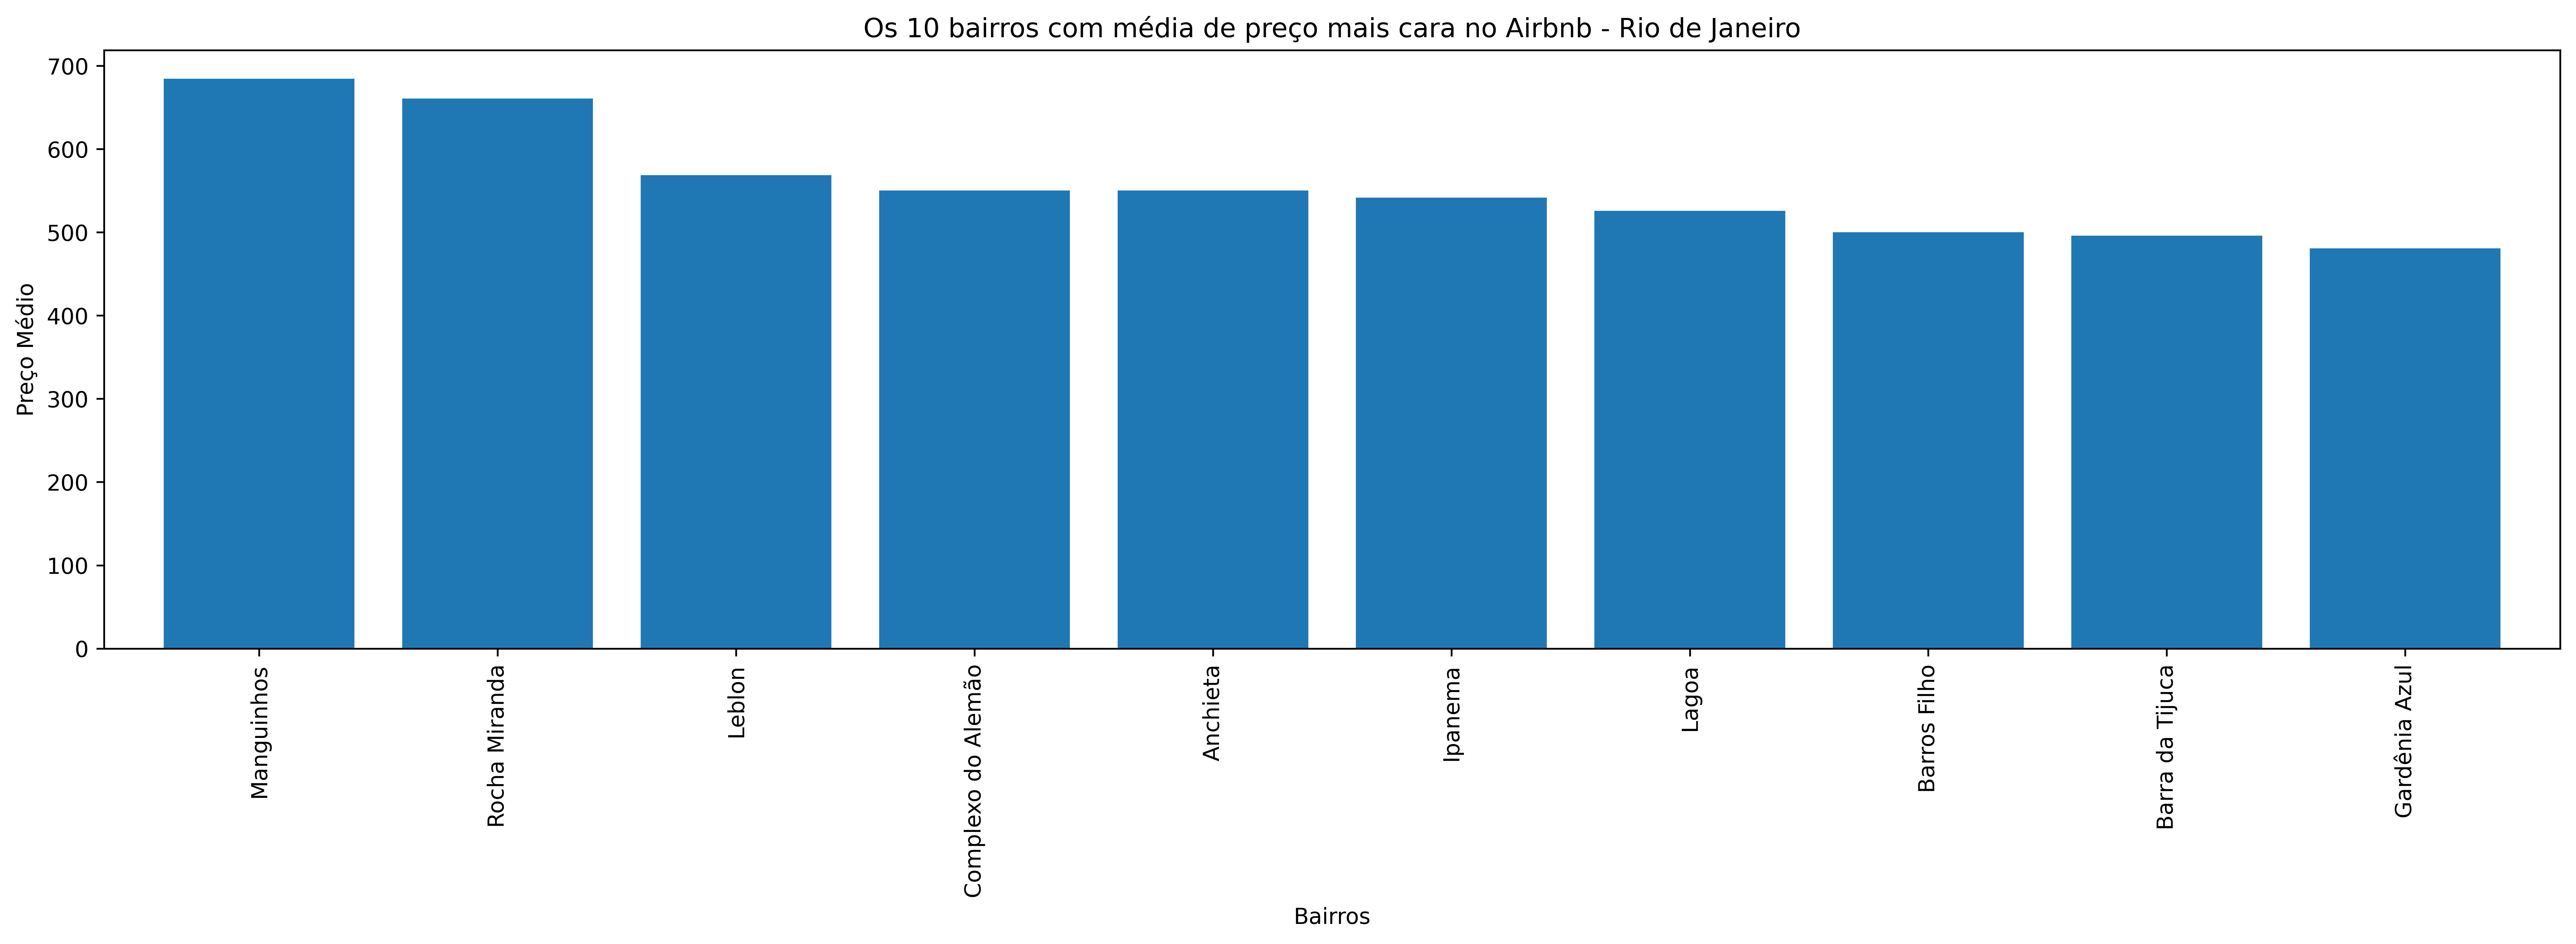

In [154]:
# Plota o gráfico dos 10 primeiros bairros com a média de preços mais alta do Rio de Janeiro.

plt.figure(figsize=(20,5), dpi=600)
df.groupby(["neighbourhood"])["price"].mean().sort_values(ascending=False)[:10].plot.bar(
    width = 0.8,
    rot    =90,
    xlabel = "Bairros",
    ylabel = "Preço Médio",
    title  = "Os 10 bairros com média de preço mais cara no Airbnb - Rio de Janeiro")

plt.plot()

[]

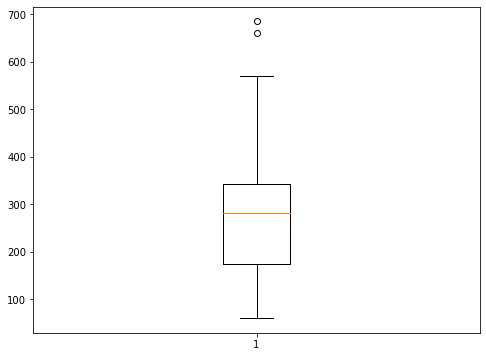

In [155]:
# Boxplot do preço das diária por bairro dos imóveis disponíveis no Airbnb Rio de Janeiro.

plt.figure(figsize= (8,6))
plt.boxplot(df.groupby(["neighbourhood"])["price"].mean(),
            autorange = True)

plt.plot()

#### A média dos preços de aluguel por bairro está na faixa de 270 reais.

### Agora vamos descobrir a média do mínimo de diárias exigidas para alugar um imóvel.

In [156]:
# Calcula a média do mínimo de diárias exigidas.
df["minimum_nights"].mean()

4.79774011299435

### E por último vamos analisar a disponibilidade desses imóveis ao longo do ano.

[]

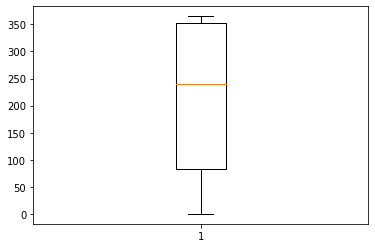

In [157]:
# Boxplot da disponibilidade dos imóveis.
plt.boxplot(df["availability_365"])
plt.plot()

#### Podemos observar que o range de disponibilidade é alto e que a média de dias disponíveis é de 250 dias.